<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="500" alt="cognitiveclass.ai logo"  />
</center>

<h1 style="color:DarkBlue; text-align:center">Polynomial Regression</h1>

<h2 style="color:DarkOrange;" id="custom-id"> Libraries Included</h2>
<ol style="color:DarkBlue;">
    <li>Pandas as pd</li>
    <li>Numpy as np</li>
    <li>Matplotlib.pyplot as plt</li>
    <li>Sklearn (multiple classes)</li>
</ol>
<i> Please make Make sure that you are looking at the Library List before each lesson starts</i>
<p>We will be compairing the resluts of a SLR to Polynomial Regression please keep that in mind when we go through certain steps.</p>

<h1> Importing the Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Importing the Dataset</h1>

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values #This will grab all the rows and all of the columns except for the last column
y = dataset.iloc[:,-1].values #Specifically targeting the last columns and all of its rows

In [3]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

<h1>Train Test Split</h1>

In [5]:
# We don't need to train test split
# Reaons 1: Data set is small enought
# Reason 2: Data shape (its curving upwards as x->)
# Why: inorder to predict the salary for an individual asking for 150k in an interview


<h1> Training our Polynomial Regression Model</h1>

In [6]:
# Regular a simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [20]:
# Polynomial
from sklearn.preprocessing import PolynomialFeatures
# m^2(x^2)++ b0 second degree polynomial
poly_reg = PolynomialFeatures(degree = 4)
# Degree is the max degree of the polynomial
# You will be always be overfitting, we will learn how to find the degree later on
# we need to adjust x to fit this set of parameters
X_poly = poly_reg.fit_transform(X)
# We want comparison between the two
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
   # We need to transform the X data and pass it through a linear regression

LinearRegression()

<i>https://youtu.be/QptI-vDle8Y</i>

<h1>Visualizing our results and compairing SLR v PLR</h1>

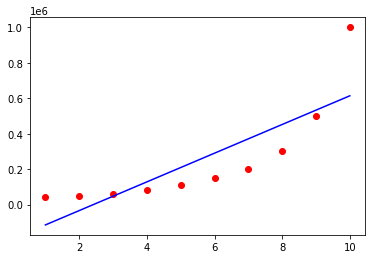

In [8]:
plt.scatter(X,y,color="red")
plt.plot(X,lin_reg.predict(X), color="blue")

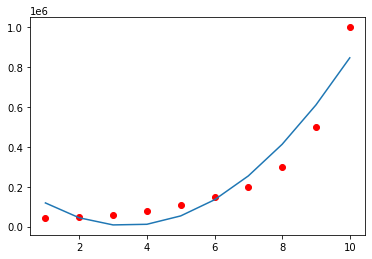

In [9]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)))

<h1>Obtaining a higher resolution in our curve</h1>

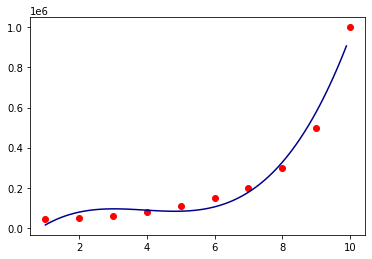

In [19]:
# We can change that increment
X_grid = np.arange(min(X),max(X),0.1)
# Reshape this in order to use it. We can't feed it into our regressor since its expecting a 2d array
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y,color="red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color="DarkBlue")

In [23]:
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

<h1>Prediction Comparisons</h1>

<p>Remember our targer is 160,000... Lets see how close we can get</p>

In [11]:
# Degree = 2
lin_reg.predict([[6.5]])

array([330378.78787879])

In [12]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])

In [13]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [14]:
from RegscorePy import bic
y_cred = lin_reg_2.predict(poly_reg.fit_transform(X))
print(bic(y,y_cred,1))

TypeError: 'module' object is not callable